In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# importing data
data = pd.read_csv('Data/Banking_churn_prediction.csv')

# converting columns to appropriate types
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# convert 'last_transaction' to datetime format
data['last_transaction'] = pd.to_datetime(data['last_transaction'])

# extracting features from 'last_transaction'
data['doy_ls_tran'] = data['last_transaction'].dt.dayofyear
data['woy_ls_tran'] = data['last_transaction'].dt.isocalendar().week
data['moy_ls_tran'] = data['last_transaction'].dt.month
data['dow_ls_tran'] = data['last_transaction'].dt.dayofweek

# dropping columns no longer needed
data = data.drop(columns=['last_transaction', 'customer_id'])

# check data types after all transformations
print(data.dtypes)


/home/msc2/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/msc2/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                         UInt32
moy_ls_tran                        float64
dow_ls_tran                        float64
dtype: obje

In [3]:


# seggregating variables into groups
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']



In [4]:


# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes



vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [5]:


# calculating correlation
correlation = numerical.dropna().corr()
correlation



,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,moy_ls_tran,dow_ls_tran
vintage,1.000000,0.003170,0.005109,-0.007223,-0.008001,-0.010858,-0.003824,-0.004821,-0.000410,-0.004899,-0.007777,-0.008703,-0.010439,-0.000680,-0.001359,-0.009683
age,0.003170,1.000000,-0.003809,0.058925,0.062775,0.070903,0.081361,0.023921,0.027678,0.025366,0.027717,0.063120,0.067712,0.010754,0.011970,-0.020895
dependents,0.005109,-0.003809,1.000000,-0.004554,-0.000826,0.000121,0.002584,0.002188,0.022772,0.006784,0.029073,-0.001859,0.000241,0.079740,0.077978,-0.001702
current_balance,-0.007223,0.058925,-0.004554,1.000000,0.809257,0.857204,0.584156,0.053329,0.101495,0.075149,0.151771,0.940234,0.812295,0.035242,0.033127,-0.000315
previous_month_end_balance,-0.008001,0.062775,-0.000826,0.809257,1.000000,0.908053,0.661439,0.051080,0.195149,0.100379,0.192376,0.910206,0.912269,0.024130,0.023485,0.002033
average_monthly_balance_prevQ,-0.010858,0.070903,0.000121,0.857204,0.908053,1.000000,0.731953,0.051294,0.138967,0.091491,0.187226,0.920943,0.983797,0.021103,0.020949,0.000647
average_monthly_balance_prevQ2,-0.003824,0.081361,0.002584,0.584156,0.661439,0.731953,1.000000,0.085542,0.127557,0.098455,0.162203,0.642531,0.701780,0.010306,0.009123,-0.002463
current_month_credit,-0.004821,0.023921,0.002188,0.053329,0.051080,0.051294,0.085542,1.000000,0.165102,0.941455,0.116125,0.055339,0.055020,0.031828,0.030267,0.000752
previous_month_credit,-0.000410,0.027678,0.022772,0.101495,0.195149,0.138967,0.127557,0.165102,1.000000,0.160198,0.749628,0.141613,0.178147,0.070141,0.066691,-0.006657
current_month_debit,-0.004899,0.025366,0.006784,0.075149,0.100379,0.091491,0.098455,0.941455,0.160198,1.000000,0.160895,0.114887,0.086993,0.037634,0.036272,0.000567


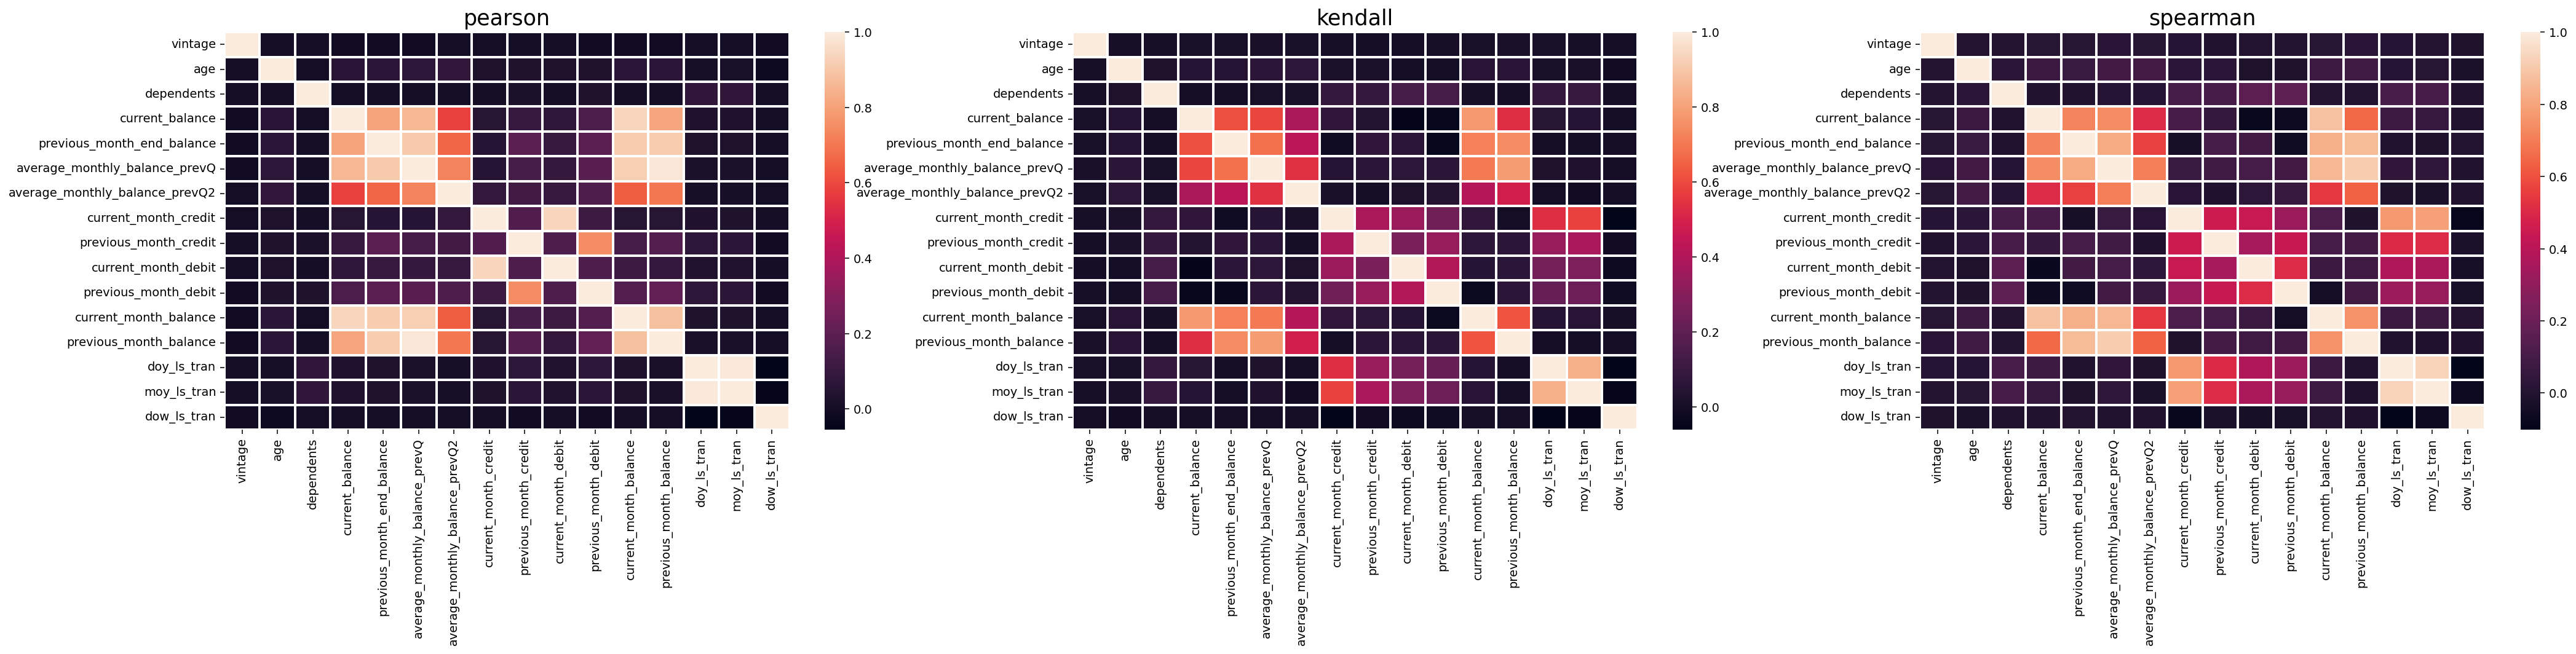

In [6]:


# plotting heatmap usingl all methods for all numerical variables (peason, kendall, spearman)
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



In [ ]:
# Grouping variables
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])
plt.show()


# balance variables
plt.figure(dpi=140, figsize = (20,20))
sns.pairplot(numerical[balance])
plt.show()

<Figure size 896x672 with 0 Axes>

<Figure size 2800x2800 with 0 Axes>

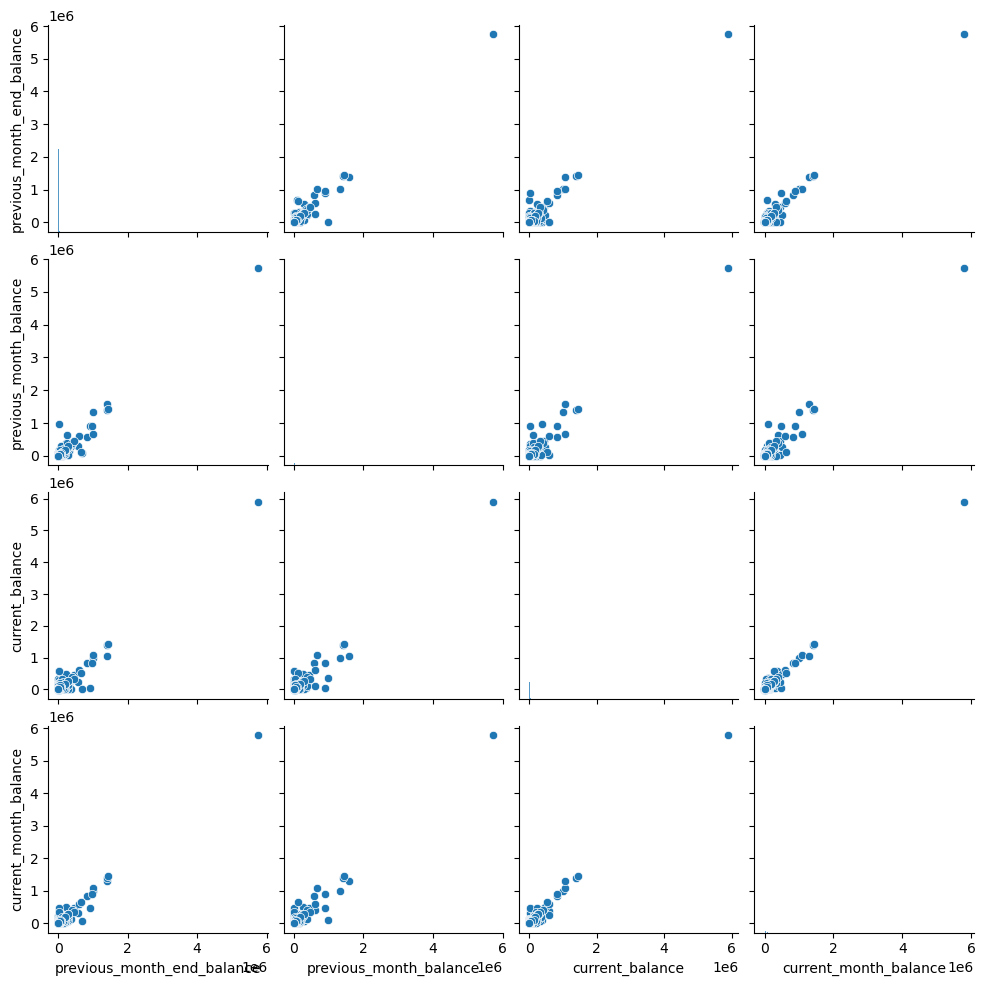

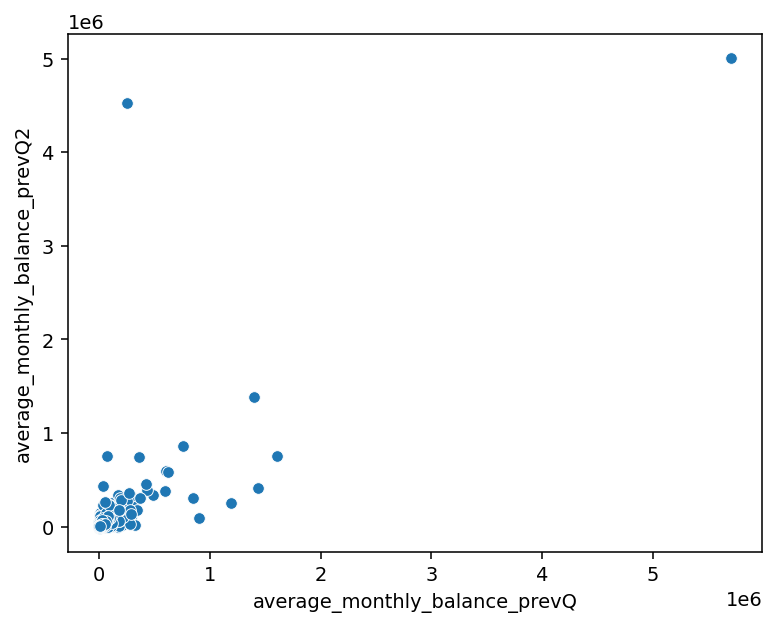

In [14]:

# Plot a scatter plot for average_monthly_balance_prevQ and average_monthly_balance_prevQ2
plt.figure(dpi=140)
sns.scatterplot(
    data=numerical,
    x='average_monthly_balance_prevQ',
    y='average_monthly_balance_prevQ2'
)
plt.show()